# Problem Statement:<br>
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

# Descriptiion of the features<br>

1. W  == Number of matches win<br>
2. R( Runs) == number of times a player crosses home plate and score counts<br>
3. AB ( At bat) == At bat or time at bat is a batter's turn batting against a pitcher<br>
4. H (Hit) == reaching base because of a batted<br>
5. 2B ( double) ==  hits on which the batter reaches second base safely without the contribution of a fielding error<br>
6. 3B (triple) == hits on which the batter reaches third base safely without the contribution of a fielding error<br>
7. HR (Home runs) == hits on which the batter successfully touched all four bases, without the contribution of a fielding error<br>
8. BB (Base on balls) == (also called a "walk") hitter not swinging at four pitches called out of the strike zone and awarded first base<br>
9. SO (Strike out) == number of batters who received strike three 
10. SB (stolen bases) ==  number of bases advanced by the runner while the ball is in the possession of the defens<br>
11. RA (Run ) ==number of runs allowed times nine divided by innings pitched<br>
12. ER (earned run) ==number of runs that did not occur as a result of errors or passed balls<br>
13. ERA (earned run average) == otal number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched<br>
14. CG (complete game) ==umber of games where player was the only pitcher for their team<br>
15. SHO (Shutout) ==number of complete games pitched with no runs allowed<br>
16. SV (Save) == number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher,if it happenes in nine innings and within 3 or 4 score
17. E (Error )==  an error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out<br>







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
baseball_ds = pd.read_csv("Baseball.csv")
baseball_ds1 = baseball_ds.copy()
baseball_ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
baseball_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


dataset has 30 rows and 17 columns including one target columns, all columns are numeric in nature and there is no missing value in the dataset 

In [6]:
# let explore the statistic

baseball_ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Columns R(Run) is slightly left skewed, AB(at Bat)  and H(Hit) are right skewed distribution, going further it has observed 2B( double) is left skewed and 3B(triple) is right skewed.<br>
HR(Home Run) CG(Complete game) are right skewed and rest are all left skewed<br>
From columns R(Run) to till 2B ( Double) SD is small which means that data is more close to mean of the data.

# Univariate Analysis

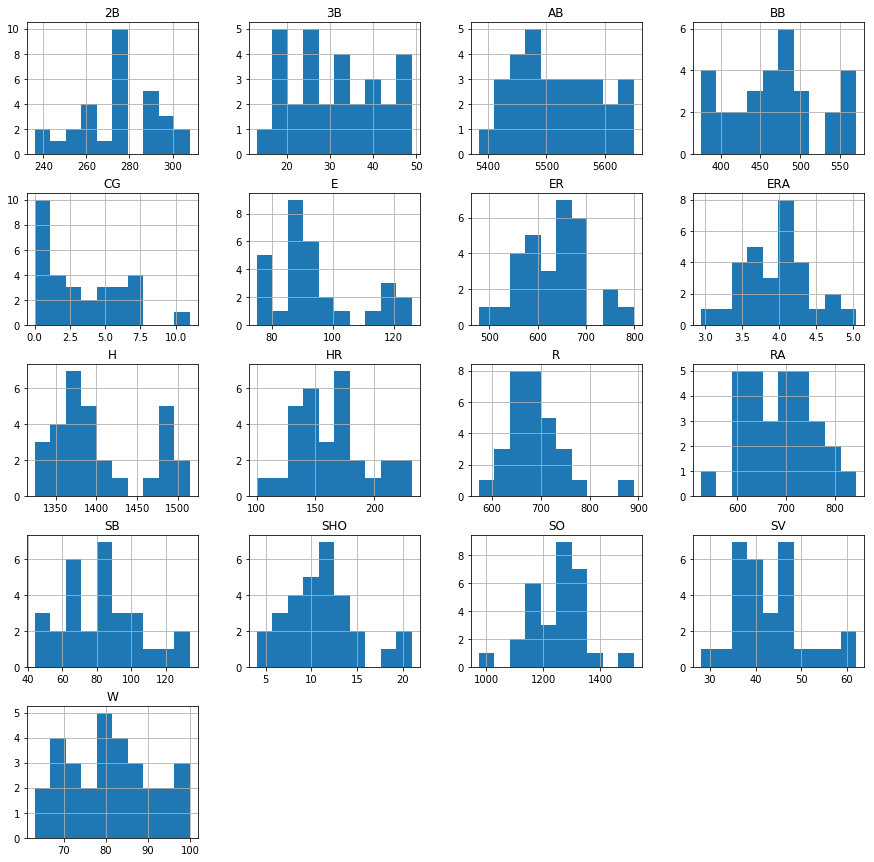

In [7]:
baseball_ds.hist(figsize=(15,15));

Every column is shewed. lets check the skewness 

In [8]:
baseball_ds.skew()*100

W        4.708869
R      120.078636
AB      18.343656
H       67.025372
2B     -23.064992
3B      12.950245
HR      51.644074
BB      15.849848
SO     -15.606548
SB      47.989287
RA       4.573398
ER       5.870980
ERA      5.333134
CG      73.684527
SHO     56.579043
SV      65.752355
E       89.013183
dtype: float64

while checking the skewness, it has been observed that many columns are above standard thresh hold , have considered 0.5 is the standard threshold, columns R, H, ER, CG, SHO, SV and E are right skewed data. we will treat the skeweness.

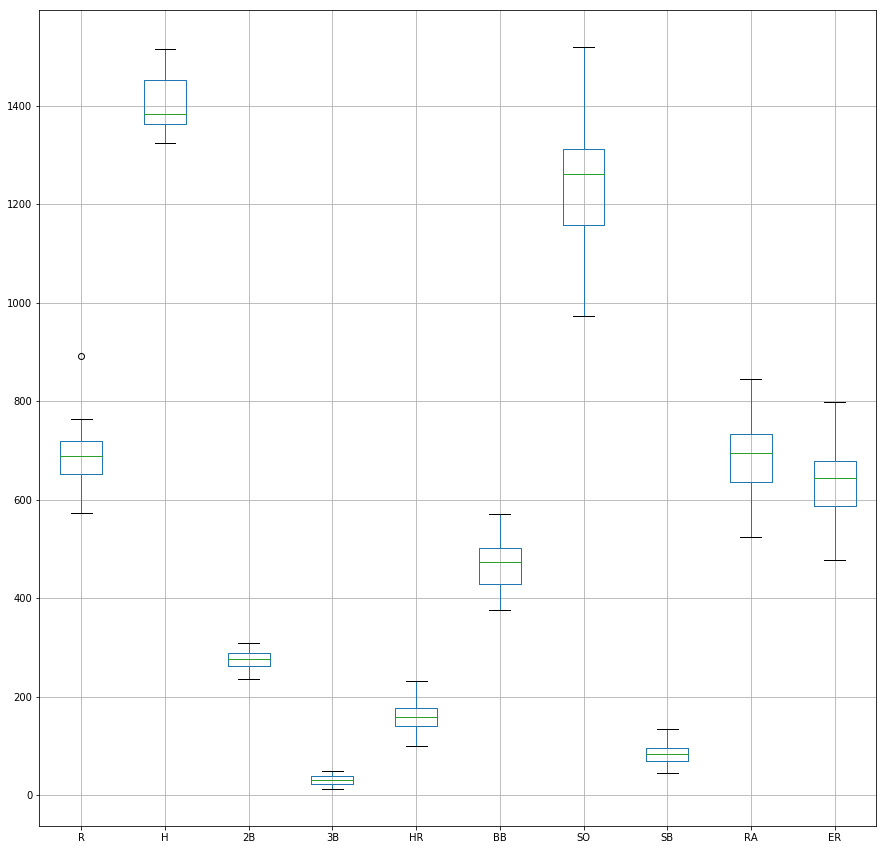

In [9]:
# let check the outlier as well in the dataset 
baseball_ds.drop(columns =["AB","W","ERA","CG","SHO","SV","E"]).boxplot(figsize=(15,15))

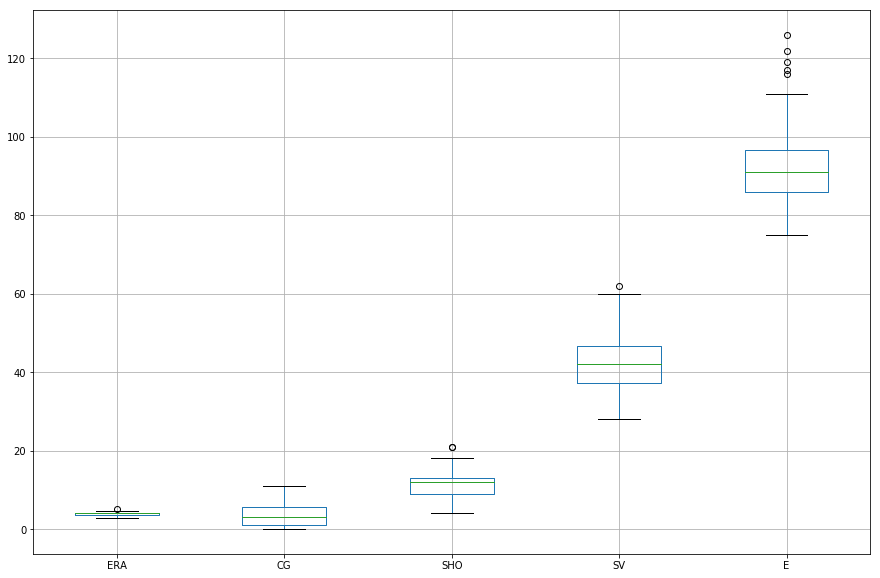

In [10]:
baseball_ds[["ERA","CG","SHO","SV","E"]].boxplot(figsize=(15,10))

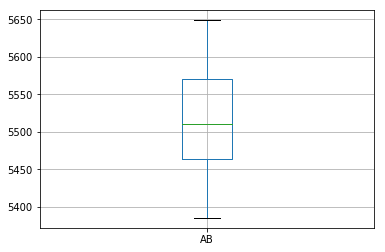

In [11]:
baseball_ds[["AB"]].boxplot()

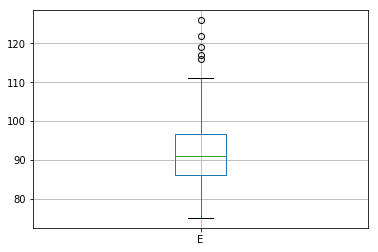

In [12]:
baseball_ds1[["E"]].boxplot()

E (Error) column has many outlier values,however SHO ,SV, ERA and R has few extreme value.

In [13]:
# checking zscore of a few of the columns
z_score = np.abs(zscore(baseball_ds1["E"]))

In [14]:
z_score

array([0.46146963, 0.60719689, 1.11724227, 0.48575751, 0.60719689,
       0.46146963, 0.0971515 , 1.26296953, 0.04857575, 0.194303  ,
       1.79730279, 0.68006051, 0.0971515 , 0.02428788, 2.30734817,
       0.12143938, 2.01589367, 1.21439378, 1.57871191, 0.31574238,
       0.46146963, 0.31574238, 1.26296953, 0.31574238, 1.65157553,
       1.40869678, 1.1901059 , 0.60719689, 0.17001513, 0.04857575])

No value about 3rd sd in Error column thus treatment isnt requirement

In [15]:
z_score1 = np.abs(zscore(baseball_ds1["R"]))
z_score1

array([0.61907797, 0.13443166, 0.33290586, 1.14641931, 0.01327008,
       3.50964704, 1.31142984, 0.4286812 , 0.76562578, 1.03448909,
       1.08641548, 0.70562195, 0.47137623, 0.55792022, 0.09981406,
       0.71369939, 0.15174045, 0.01327008, 0.57522902, 0.83486097,
       0.0905827 , 0.25559323, 1.30219848, 1.99455036, 1.07718413,
       0.36752345, 0.13443166, 0.54984278, 0.661773  , 0.84409233])

we have one observation which is above 3rd SD but it wont impact on the model, so no treament is required

In [16]:
z_score2 = np.abs(zscore(baseball_ds1["ERA"]))
z_score2

array([0.50695519, 0.25459752, 0.64134684, 0.05301004, 1.53131824,
       0.35016492, 0.16500309, 0.20980031, 0.48455658, 0.79216414,
       0.63537388, 0.86533293, 0.03658439, 0.45618501, 0.41138779,
       2.2764453 , 1.67168286, 1.33570372, 0.72496831, 0.83696136,
       1.17891346, 0.75333989, 0.14260448, 1.01615023, 1.64331129,
       1.15651485, 0.52935379, 0.1874017 , 0.29939474, 2.42726261])

ERA also doesnt have any value beyond 3rd SD.


while checking the outlier through boxplot, we have found a few of the columns have outliers values but while calculating the zscore or 3rd standard of these columns, we have got that all values are well under the 3rd standard deviation except one value in R column. Box plot calculate upper limit basis 2.7 by adding Q3  and 1.5*IQR.So no columns need treatment  

In [17]:
 # applying sqrt transformation becase it has value 0 and cant applying log on it.
baseball_ds["CG"] = np.sqrt(baseball_ds["CG"])
baseball_ds["ER"] = np.sqrt(baseball_ds["ER"])
baseball_ds["SV"] = np.sqrt(baseball_ds["SV"])
baseball_ds["SHO"] = np.sqrt(baseball_ds["SHO"])

In [19]:
baseball_ds.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER    -0.109548
ERA    0.053331
CG    -0.311476
SHO   -0.061761
SV     0.410288
E      0.890132
dtype: float64

In [58]:
# taking 3 columns which skewness could not corrected and applying power transform
new_data = baseball_ds[["R","H","E"]]
new_data = new_data.astype("float32") change the data type of the variabel to float

In [62]:
df = power_transform(new_data) # applied power_transform
df = pd.DataFrame(df) # saving into a dataframe becuase it returns numpy array
df.skew() # again checking their skewness and now it is corrected

0    0.121253
1    0.570348
2    0.068565
dtype: float32

In [63]:
new_baseball_ds =  pd.concat([baseball_ds,df],axis =1,join ="inner") # joining both the data points

In [66]:
new_baseball_ds.drop(columns = ["R","H","E"],axis =1, inplace= True) # dropping duplicate columns and keeping transformed columns
new_baseball_ds.rename(columns ={0:"R",1:"H",2:"E"},inplace= True) # while it has converted by power transform their name has been changed to their index to changing columns name to it name


# saving all changes into original variable

baseball_ds = new_baseball_ds.copy()

,W,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,R,H,E
0,95,5575,300,42,139,383,973,104,641,24.515301,3.73,1.414214,2.828427,7.483315,0.722290,1.632309,-0.336642
1,83,5467,277,44,156,439,1264,70,700,25.553865,4.07,1.414214,3.464102,6.708204,0.243600,-1.019873,-0.530925
2,81,5439,303,29,141,533,1157,86,640,24.166092,3.67,3.316625,3.162278,6.164414,-0.267003,-0.097375,-1.342752
3,76,5533,260,27,136,404,1231,68,701,25.357445,3.98,2.645751,3.000000,6.082763,-1.272251,-0.366437,0.679876
4,74,5605,289,49,151,455,1259,83,803,27.313001,4.64,2.645751,3.464102,5.916080,0.115949,1.901371,-0.530925
5,93,5509,308,17,232,570,1151,88,670,24.677925,3.80,2.645751,3.162278,5.830952,2.796612,1.363247,-0.336642
6,87,5567,272,19,212,554,1227,63,698,25.534291,4.03,1.732051,2.000000,6.928203,1.312674,-0.097375,0.103965
7,81,5485,246,20,217,418,1331,44,693,25.416530,4.05,0.000000,3.162278,6.557439,0.530814,-0.558624,-1.613361
8,80,5485,278,32,167,436,1310,87,642,24.576411,3.74,1.000000,3.464102,7.745967,-0.777605,-0.327999,0.260085
9,78,5640,294,33,161,478,1148,71,753,26.343880,4.31,1.732051,3.162278,6.324555,1.089285,1.593871,0.409267


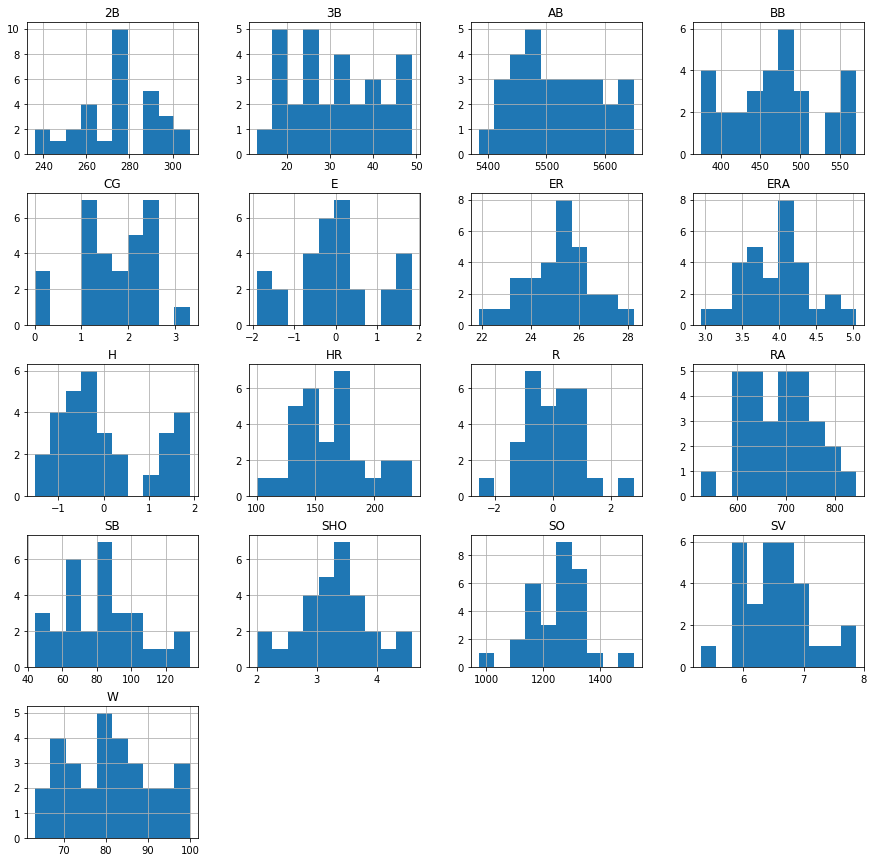

In [73]:
baseball_ds.hist(figsize=(15,15));

feature seems close to nornal distribtion after correcting the skewness. i have applied np.sqrt and power_transform to the feature for correcting their skewness

# Bivariate analysis

Text(0.5, 1.0, 'CG wise wins')

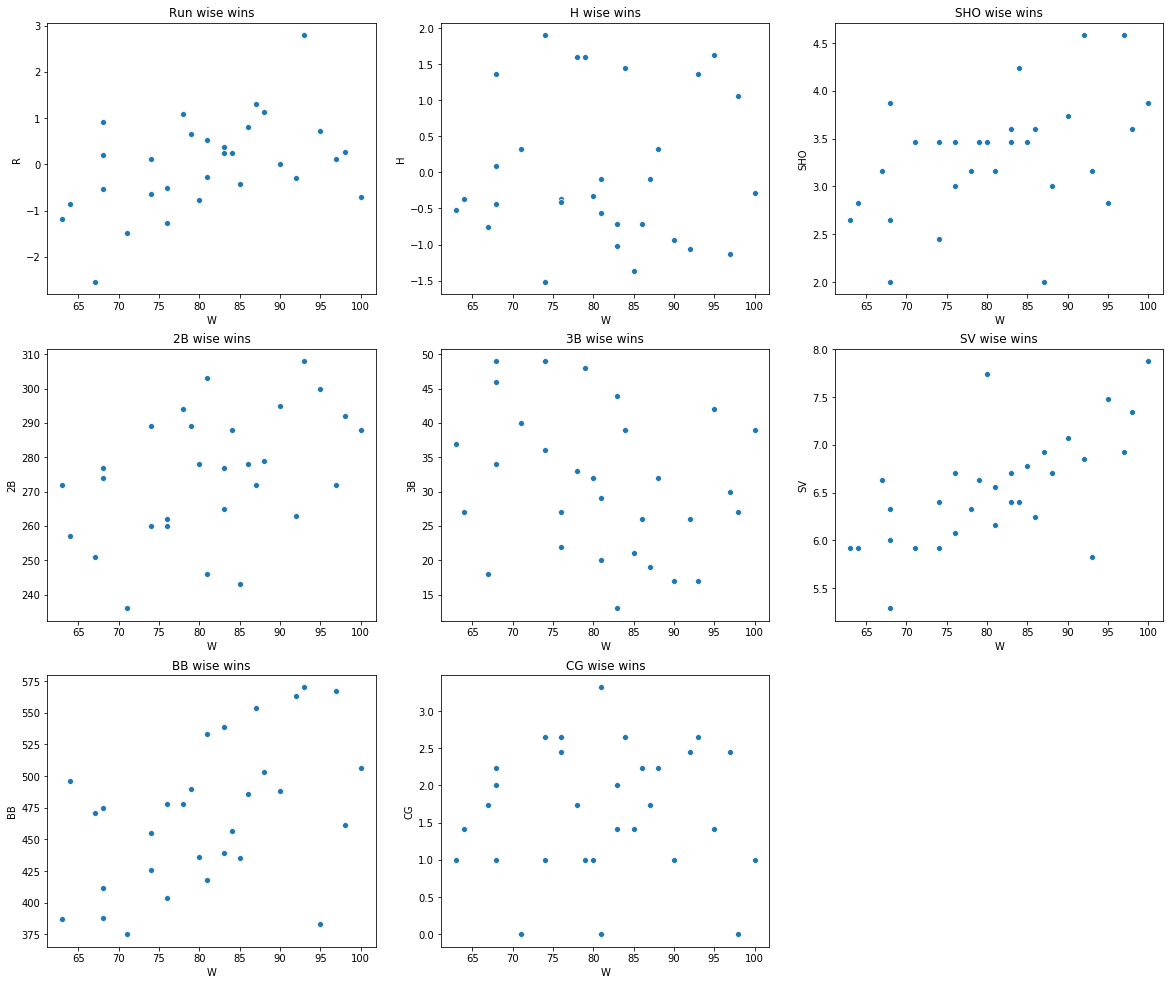

In [75]:
# checking some random features' relation with Win. 
plt.figure(figsize=(20,17))
plt.subplot(331)
sns.scatterplot(x = "W", y = "R", data = baseball_ds)
plt.title("Run wise wins")

plt.subplot(332)
sns.scatterplot(x = "W", y = "H", data = baseball_ds)
plt.title("H wise wins")

plt.subplot(333)
sns.scatterplot(x = "W", y = "SHO", data = baseball_ds)
plt.title("SHO wise wins")

plt.subplot(334)
sns.scatterplot(x = "W", y = "2B", data = baseball_ds)
plt.title("2B wise wins")

plt.subplot(335)
sns.scatterplot(x = "W", y = "3B", data = baseball_ds)
plt.title("3B wise wins")

plt.subplot(336)
sns.scatterplot(x = "W", y = "SV", data = baseball_ds)
plt.title("SV wise wins")

plt.subplot(337)
sns.scatterplot(x = "W", y = "BB", data = baseball_ds)
plt.title("BB wise wins")

plt.subplot(338)
sns.scatterplot(x = "W", y = "CG", data = baseball_ds)
plt.title("CG wise wins")

Run ,SHO SV and BB are looking positive correlation 

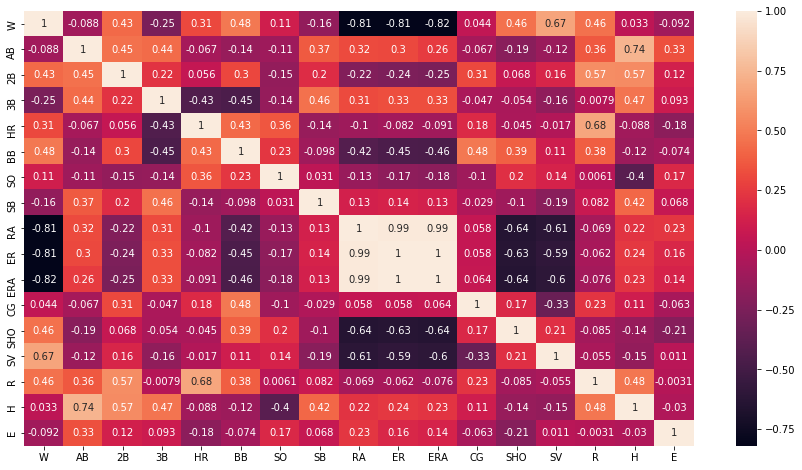

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(baseball_ds.corr(),annot=True)

Columns SV (Save) BB( Base on balls) ,SHO (Shutout)m R ( Run) and 2B are positive contributing to the response variable,which tell that if these parameters are increased then chances for winning increases.<br> ERA (Earned run average) is highly nagetively correlated  followed by ER ( Earned run) RA ( run Average). <br><br> Since many features are below 70% correction and few are above, i am taking threshold value 70%, above 70% are highly correlated and should be dropped<br><br> ERA , RA and ER, are highly correlated with each other.<br> H and AB are highly correlated with each other <br> CG AB and H have least contribution to predict the win 



# Modeling

In [77]:
# Dropping the most correlated columns 
baseball_ds = baseball_ds.drop(columns=["RA","ER","AB","HR"]) 

In [78]:

# Seprate the data into train and test

X = baseball_ds.drop("W",axis = 1)
y = baseball_ds["W"]

# assiging some important value to a value for Adjusted R2 score
Num_predictor = X.columns
n_size  = len(X)

# appying Standard scaler on the data to bring all feature at same scale
Sc = StandardScaler()
X = Sc.fit_transform(X)

models = [LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]


In [79]:
LR = LinearRegression()
for i in range(50,200,40):
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = i)
  LR.fit(X_train,y_train)
  print("training_score :",LR.score(X_train,y_train),"Random_state", i )
  pred = LR.predict(X_test)
  print("Test_score : ",LR.score(X_test,y_test))
  print("Root_Mean_squared_Error",mean_squared_error(y_test,pred,squared=False))
  print("Mean_squared_Error",mean_squared_error(y_test,pred))
  print("R2_score",r2_score(y_test,pred),"\n")

training_score : 0.9575970930860026 Random_state 50
Test_score :  0.7578493190105782
Root_Mean_squared_Error 5.423792412678078
Mean_squared_Error 29.41752413582429
R2_score 0.7578493190105782 

training_score : 0.9383095933092807 Random_state 90
Test_score :  0.7438348617208498
Root_Mean_squared_Error 5.105369998335433
Mean_squared_Error 26.064802819903537
R2_score 0.7438348617208498 

training_score : 0.937412445523522 Random_state 130
Test_score :  0.04128626668479596
Root_Mean_squared_Error 6.475240994006102
Mean_squared_Error 41.928745930457126
R2_score 0.04128626668479596 

training_score : 0.9340738400011832 Random_state 170
Test_score :  0.7075296179934616
Root_Mean_squared_Error 4.992847906389554
Mean_squared_Error 24.92853021633855
R2_score 0.7075296179934616 



In [80]:
from sklearn.linear_model import Lasso, Ridge
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.25, random_state = 90)

In [81]:
Las = Lasso(alpha= 1)
Las.fit(X_train1,y_train1)
print("training_score :",Las.score(X_train1,y_train1))
pred = Las.predict(X_test1)
print("Test_score : ",Las.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.8732248162306566
Test_score :  0.8963565193749327
Root_Mean_squared_Error 3.247418074963647
Mean_squared_Error 10.545724153600599
R2_score 0.8963565193749327


In [82]:
rig = Ridge(alpha= 1)
rig.fit(X_train1,y_train1)
print("training_score :" , rig.score(X_train1,y_train1))
pred = rig.predict(X_test1)
print("Test_score : ",rig.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
r2 = r2_score(y_test1,pred)
print("R2_score",r2_score(y_test1,pred))

training_score : 0.93218773402353
Test_score :  0.8035924385824933
Root_Mean_squared_Error 4.470399241033323
Mean_squared_Error 19.98446937423131
R2_score 0.8035924385824933


In [83]:
RR = RandomForestRegressor(n_estimators=300,max_depth=3,max_features= "sqrt")
RR.fit(X_train1,y_train1)
print("training_score :" , RR.score(X_train1,y_train1))
pred = RR.predict(X_test1)
print("Test_score : ",RR.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.8750155502437695
Test_score :  0.5674651999500604
Root_Mean_squared_Error 6.634034662637915
Mean_squared_Error 44.01041590508136
R2_score 0.5674651999500604


In [84]:
KNR = KNeighborsRegressor()
KNR.fit(X_train1,y_train1)
print("training_score :" , KNR.score(X_train1,y_train1))
pred = KNR.predict(X_test1)
print("Test_score : ",KNR.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.6045443841803547
Test_score :  0.43449631449631454
Root_Mean_squared_Error 7.585512507405152
Mean_squared_Error 57.54
R2_score 0.43449631449631454


In [85]:
Adabost = AdaBoostRegressor(n_estimators=200)
Adabost.fit(X_train1,y_train1)
print("training_score :" , Adabost.score(X_train1,y_train1))
pred = Adabost.predict(X_test1)
print("Test_score : ",Adabost.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.9951203300807571
Test_score :  0.42668994752328104
Root_Mean_squared_Error 7.637689299749379
Mean_squared_Error 58.334297839506156
R2_score 0.42668994752328104


In [86]:
GradiantBoost = GradientBoostingRegressor(n_estimators=200)
GradiantBoost.fit(X_train1,y_train1)
print("training_score :" , GradiantBoost.score(X_train1,y_train1))
pred = GradiantBoost.predict(X_test1)
print("Test_score : ",GradiantBoost.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.9999999999914655
Test_score :  -0.01450362473272837
Root_Mean_squared_Error 10.160007077583908
Mean_squared_Error 103.22574381655511
R2_score -0.01450362473272837


# Observation:<br>
Data has been splitted into X and y and it has been standarized as well because saveral columns have different scale. After sepration into x and y, it has been divided into train and test with 0.2 test data and rest are all training data. i have tried multiple model on the same dara to check that which one is working fine. i ahve checked the same with Linear regression first and with multiple random state. it has been observed that random state 170 is giving more accuracy, where train and test score are too close and we can see that there is no overfitting scenario here. I have also tried lasso and ridge regression to improve the performance and we seen that lasso has given few ore point jump in both training and test score. later on, i tried ensemable techinqe and found that their performance is overfit. I have tried KNN regressor also and it has too low score,so finally i have taken lasso as the final model and appying gridsearchCV and cross validation.   

In [87]:
# taking ridge as the final model
parameter = {"alpha" : [0.3,0.4,0.5,0.7,1]}
grid_lasso = Lasso()

grid_search = GridSearchCV(grid_lasso,parameter,scoring = "neg_mean_squared_error",cv = 10, n_jobs =-1, verbose = 2) 

grid_search.fit(X_train1,y_train1)
print(grid_search.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 1}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


In [88]:
best_Las = Lasso(alpha= 1)
for i in range(2,10):
  cross_score = cross_val_score(best_Las,X,y,cv = i)
  print(i,"Mean ",cross_score.mean(),"STD",cross_score.std())

2 Mean  0.5432689867168059 STD 0.08427196961137895
3 Mean  0.7038658394883788 STD 0.19968733391068447
4 Mean  0.8076569512631662 STD 0.08431845814153319
5 Mean  0.5639142733434104 STD 0.395221274617481
6 Mean  0.6200711496958987 STD 0.3899397120702147
7 Mean  0.5511878929823146 STD 0.3756393950807367
8 Mean  0.6301081800023645 STD 0.45050689062368066
9 Mean  -3.4371542790760046 STD 11.35693235535473


In [89]:
cross_score = cross_val_score(best_Las,X,y,cv = 4)
print("Mean ",cross_score.mean(),"STD",cross_score.std())

Mean  0.8076569512631662 STD 0.08431845814153319


# Conclusion:-<br>

Dataset is very small, has only 30 observations and 17 columns.it has not outlier values. A few columns were skewed. we performed treatment for skewness by applying sqrt transformation. 3 columns' skewness could not be corrected even after applying multiple transformer.<br> i have checked the correlation of the predictors  with target column and found that couple of features were explaining less information, we observed couple of predictors were correlated with each other.i have deleted the those columns, all are expalation given in each sections.<br><br>**Modeling**:- 5 differents model are applied to the datapoint. we seen that Lasso, linear and ridge regressions are working well on the dataset, other ensemble learning are not giving overfitting.<br>
Regularization method lasso is working well, have performed Gridseach CV and cross_val_score.





# Model Saving

In [90]:
import pickle 
best_lasso = Lasso(alpha = 1)
best_lasso.fit(X,y)
filename = "baseball_win.pkl"
with open(filename,"wb")as f:
  pickle.dump(best_lasso,f)